In [147]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV, LogisticRegressionCV
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier 
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

## 1- Data Cleaning and Data Visualization

In [148]:
credit = pd.read_csv("german_credit.csv")
credit.head()

,checking_acc_status,duration,cred_hist,purpose,loan_amt,saving_acc_bonds,present_employment_since,installment_rate,personal_stat_gender,other_debtors_guarantors,...,property,age,other_installment_plans,housing,num_curr_loans,job,num_people_provide_maint,telephone,is_foreign_worker,target
0,below_0,6,risky_acc_or_curr_loan_other,radio_tv,1169,unknown_no_saving_acc,above_7y,4,male:single,none,...,real_estate,67,none,own,2,skilled_official,1,yes,yes,good
1,below_200,48,curr_loans_paid_duly,radio_tv,5951,below_100,below_4y,2,female:divorced_or_married,none,...,real_estate,22,none,own,1,skilled_official,1,no,yes,bad
2,no_cheking_acc,12,risky_acc_or_curr_loan_other,education,2096,below_100,below_7y,2,male:single,none,...,real_estate,49,none,own,1,unskilled_resident,2,no,yes,good
3,below_0,42,curr_loans_paid_duly,furniture_equipment,7882,below_100,below_7y,2,male:single,guarantor,...,life_insurance_or_aggreements,45,none,for_free,1,skilled_official,2,no,yes,good
4,below_0,24,delay_in_past,car_new,4870,below_100,below_4y,3,male:single,none,...,unknown_or_no_property,53,none,for_free,2,skilled_official,2,no,yes,bad


In [149]:
credit.isnull().sum()

checking_acc_status         0
duration                    0
cred_hist                   0
purpose                     0
loan_amt                    0
saving_acc_bonds            0
present_employment_since    0
installment_rate            0
personal_stat_gender        0
other_debtors_guarantors    0
present_residence_since     0
property                    0
age                         0
other_installment_plans     0
housing                     0
num_curr_loans              0
job                         0
num_people_provide_maint    0
telephone                   0
is_foreign_worker           0
target                      0
dtype: int64

In [150]:
credit.isna().sum()

checking_acc_status         0
duration                    0
cred_hist                   0
purpose                     0
loan_amt                    0
saving_acc_bonds            0
present_employment_since    0
installment_rate            0
personal_stat_gender        0
other_debtors_guarantors    0
present_residence_since     0
property                    0
age                         0
other_installment_plans     0
housing                     0
num_curr_loans              0
job                         0
num_people_provide_maint    0
telephone                   0
is_foreign_worker           0
target                      0
dtype: int64

In [151]:
credit.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [152]:
len(credit.drop_duplicates())

1000

In [153]:
import numpy as np

In [154]:
bins = [0,35,55,float("inf")]
class_age = ["junior","medium","old"]
credit["class_age"] = pd.cut(credit["age"], bins = bins, labels = class_age, right = False)


In [155]:
credit

,checking_acc_status,duration,cred_hist,purpose,loan_amt,saving_acc_bonds,present_employment_since,installment_rate,personal_stat_gender,other_debtors_guarantors,...,age,other_installment_plans,housing,num_curr_loans,job,num_people_provide_maint,telephone,is_foreign_worker,target,class_age
0,below_0,6,risky_acc_or_curr_loan_other,radio_tv,1169,unknown_no_saving_acc,above_7y,4,male:single,none,...,67,none,own,2,skilled_official,1,yes,yes,good,old
1,below_200,48,curr_loans_paid_duly,radio_tv,5951,below_100,below_4y,2,female:divorced_or_married,none,...,22,none,own,1,skilled_official,1,no,yes,bad,junior
2,no_cheking_acc,12,risky_acc_or_curr_loan_other,education,2096,below_100,below_7y,2,male:single,none,...,49,none,own,1,unskilled_resident,2,no,yes,good,medium
3,below_0,42,curr_loans_paid_duly,furniture_equipment,7882,below_100,below_7y,2,male:single,guarantor,...,45,none,for_free,1,skilled_official,2,no,yes,good,medium
4,below_0,24,delay_in_past,car_new,4870,below_100,below_4y,3,male:single,none,...,53,none,for_free,2,skilled_official,2,no,yes,bad,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no_cheking_acc,12,curr_loans_paid_duly,furniture_equipment,1736,below_100,below_7y,3,female:divorced_or_married,none,...,31,none,own,1,unskilled_resident,1,no,yes,good,junior
996,below_0,30,curr_loans_paid_duly,car_used,3857,below_100,below_4y,4,male:divorced,none,...,40,none,own,1,management_or_self_emp,1,yes,yes,good,medium
997,no_cheking_acc,12,curr_loans_paid_duly,radio_tv,804,below_100,above_7y,4,male:single,none,...,38,none,own,1,skilled_official,1,no,yes,good,medium
998,below_0,45,curr_loans_paid_duly,radio_tv,1845,below_100,below_4y,4,male:single,none,...,23,none,for_free,1,skilled_official,1,yes,yes,bad,junior


In [156]:
col_to_move = "target"
col_removed = credit.pop(col_to_move)
credit[col_to_move] = col_removed

In [157]:
credit["loan_amt"]= np.log(credit["loan_amt"])

In [158]:
credit.head()

,checking_acc_status,duration,cred_hist,purpose,loan_amt,saving_acc_bonds,present_employment_since,installment_rate,personal_stat_gender,other_debtors_guarantors,...,age,other_installment_plans,housing,num_curr_loans,job,num_people_provide_maint,telephone,is_foreign_worker,class_age,target
0,below_0,6,risky_acc_or_curr_loan_other,radio_tv,7.063904,unknown_no_saving_acc,above_7y,4,male:single,none,...,67,none,own,2,skilled_official,1,yes,yes,old,good
1,below_200,48,curr_loans_paid_duly,radio_tv,8.691315,below_100,below_4y,2,female:divorced_or_married,none,...,22,none,own,1,skilled_official,1,no,yes,junior,bad
2,no_cheking_acc,12,risky_acc_or_curr_loan_other,education,7.647786,below_100,below_7y,2,male:single,none,...,49,none,own,1,unskilled_resident,2,no,yes,medium,good
3,below_0,42,curr_loans_paid_duly,furniture_equipment,8.972337,below_100,below_7y,2,male:single,guarantor,...,45,none,for_free,1,skilled_official,2,no,yes,medium,good
4,below_0,24,delay_in_past,car_new,8.490849,below_100,below_4y,3,male:single,none,...,53,none,for_free,2,skilled_official,2,no,yes,medium,bad


In [159]:
credit.describe()

,duration,loan_amt,installment_rate,present_residence_since,age,num_curr_loans,num_people_provide_maint
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,7.788691,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,0.776474,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,5.521461,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,7.219276,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,7.749107,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,8.287088,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,9.821409,4.000000,4.000000,75.000000,4.000000,2.000000


From this dataset we can see that loan_amt, num_people_provide_maint and age are quite symmetrical. 

O duplicates in this dataset.

In [160]:
credit["checking_acc_status"].value_counts()

no_cheking_acc    394
below_0           274
below_200         269
above:200          63
Name: checking_acc_status, dtype: int64

In [161]:
print(credit["other_debtors_guarantors"].value_counts())
n_guarantors=[907,52,41]
guarantors = ["none","guarantor","co-applicant"]

none            907
guarantor        52
co_applicant     41
Name: other_debtors_guarantors, dtype: int64


In [162]:
credit["is_foreign_worker"].value_counts()

yes    963
no      37
Name: is_foreign_worker, dtype: int64

In [163]:
credit["property"].value_counts()

car_or_other                     332
real_estate                      282
life_insurance_or_aggreements    232
unknown_or_no_property           154
Name: property, dtype: int64

In [164]:
credit["personal_stat_gender"].value_counts()

male:single                   548
female:divorced_or_married    310
male:married_or_widowed        92
male:divorced                  50
Name: personal_stat_gender, dtype: int64

In [165]:
credit["target"].value_counts()

good    700
bad     300
Name: target, dtype: int64

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt

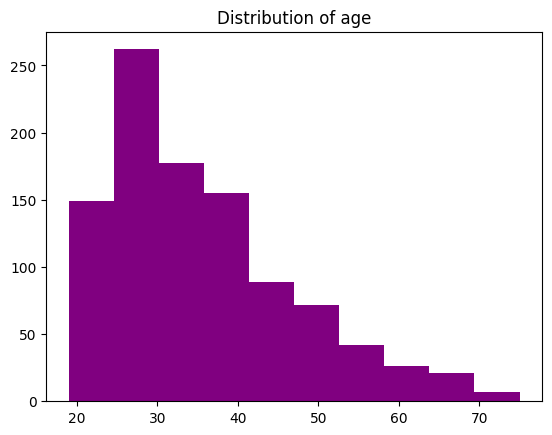

In [167]:
plt.hist(data=credit, x ="age", color="purple")
plt.title("Distribution of age")
plt.show()

The most of the population is between 25 and 35. So, the most of the clients are in the junior class.

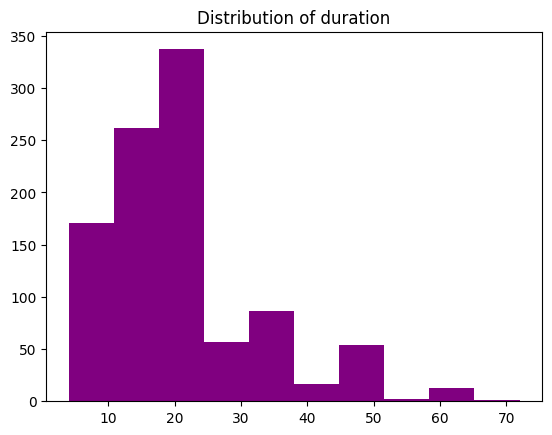

In [168]:
plt.hist(data=credit, x="duration",color="purple")
plt.title("Distribution of duration")
plt.show()

The most of duration is about 20 years. The major part of the people go from 5 to approximately 20.

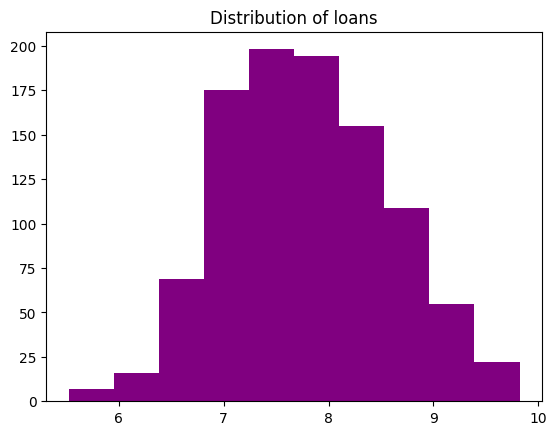

In [169]:
plt.hist(data=credit, x ="loan_amt", color="purple")
plt.title("Distribution of loans")
plt.show()

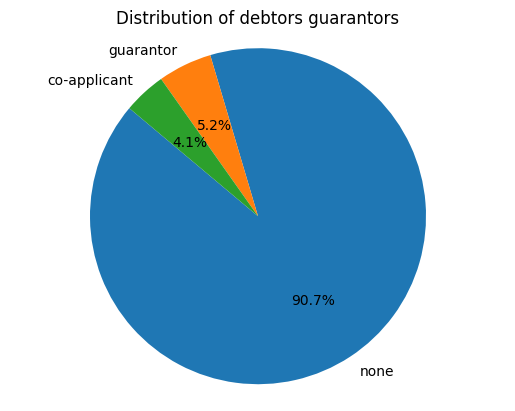

In [170]:
plt.pie(n_guarantors,labels=guarantors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of debtors guarantors')
plt.axis('equal') 
plt.show()

The major part of the loans is distributed from 500 to 4000 approximately. The most of them haven't a guarantor or a co-applicant, this could impact on the garancy of the bank to obtain the ship in the case of failure of the client. We will see that later, with the computation of the Loss Given default.

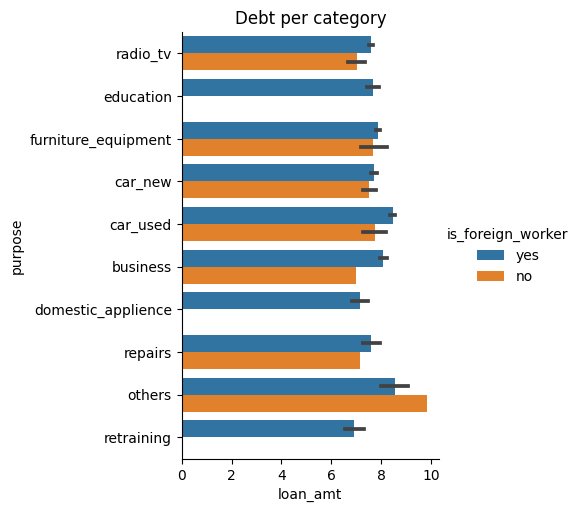

In [171]:
sns.catplot(data = credit, y="purpose", x = "loan_amt",hue="is_foreign_worker", kind="bar")
plt.title("Debt per category")
plt.show()

In [172]:
from sklearn.preprocessing import LabelEncoder

In [173]:
credit = credit.drop("age", axis = 1)
credit

,checking_acc_status,duration,cred_hist,purpose,loan_amt,saving_acc_bonds,present_employment_since,installment_rate,personal_stat_gender,other_debtors_guarantors,...,property,other_installment_plans,housing,num_curr_loans,job,num_people_provide_maint,telephone,is_foreign_worker,class_age,target
0,below_0,6,risky_acc_or_curr_loan_other,radio_tv,7.063904,unknown_no_saving_acc,above_7y,4,male:single,none,...,real_estate,none,own,2,skilled_official,1,yes,yes,old,good
1,below_200,48,curr_loans_paid_duly,radio_tv,8.691315,below_100,below_4y,2,female:divorced_or_married,none,...,real_estate,none,own,1,skilled_official,1,no,yes,junior,bad
2,no_cheking_acc,12,risky_acc_or_curr_loan_other,education,7.647786,below_100,below_7y,2,male:single,none,...,real_estate,none,own,1,unskilled_resident,2,no,yes,medium,good
3,below_0,42,curr_loans_paid_duly,furniture_equipment,8.972337,below_100,below_7y,2,male:single,guarantor,...,life_insurance_or_aggreements,none,for_free,1,skilled_official,2,no,yes,medium,good
4,below_0,24,delay_in_past,car_new,8.490849,below_100,below_4y,3,male:single,none,...,unknown_or_no_property,none,for_free,2,skilled_official,2,no,yes,medium,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no_cheking_acc,12,curr_loans_paid_duly,furniture_equipment,7.459339,below_100,below_7y,3,female:divorced_or_married,none,...,real_estate,none,own,1,unskilled_resident,1,no,yes,junior,good
996,below_0,30,curr_loans_paid_duly,car_used,8.257645,below_100,below_4y,4,male:divorced,none,...,life_insurance_or_aggreements,none,own,1,management_or_self_emp,1,yes,yes,medium,good
997,no_cheking_acc,12,curr_loans_paid_duly,radio_tv,6.689599,below_100,above_7y,4,male:single,none,...,car_or_other,none,own,1,skilled_official,1,no,yes,medium,good
998,below_0,45,curr_loans_paid_duly,radio_tv,7.520235,below_100,below_4y,4,male:single,none,...,unknown_or_no_property,none,for_free,1,skilled_official,1,yes,yes,junior,bad


In [174]:
variable_to_convert = "purpose"
label_encoder = LabelEncoder()
credit[variable_to_convert]=label_encoder.fit_transform(credit[variable_to_convert])
credit

,checking_acc_status,duration,cred_hist,purpose,loan_amt,saving_acc_bonds,present_employment_since,installment_rate,personal_stat_gender,other_debtors_guarantors,...,property,other_installment_plans,housing,num_curr_loans,job,num_people_provide_maint,telephone,is_foreign_worker,class_age,target
0,below_0,6,risky_acc_or_curr_loan_other,7,7.063904,unknown_no_saving_acc,above_7y,4,male:single,none,...,real_estate,none,own,2,skilled_official,1,yes,yes,old,good
1,below_200,48,curr_loans_paid_duly,7,8.691315,below_100,below_4y,2,female:divorced_or_married,none,...,real_estate,none,own,1,skilled_official,1,no,yes,junior,bad
2,no_cheking_acc,12,risky_acc_or_curr_loan_other,4,7.647786,below_100,below_7y,2,male:single,none,...,real_estate,none,own,1,unskilled_resident,2,no,yes,medium,good
3,below_0,42,curr_loans_paid_duly,5,8.972337,below_100,below_7y,2,male:single,guarantor,...,life_insurance_or_aggreements,none,for_free,1,skilled_official,2,no,yes,medium,good
4,below_0,24,delay_in_past,1,8.490849,below_100,below_4y,3,male:single,none,...,unknown_or_no_property,none,for_free,2,skilled_official,2,no,yes,medium,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no_cheking_acc,12,curr_loans_paid_duly,5,7.459339,below_100,below_7y,3,female:divorced_or_married,none,...,real_estate,none,own,1,unskilled_resident,1,no,yes,junior,good
996,below_0,30,curr_loans_paid_duly,2,8.257645,below_100,below_4y,4,male:divorced,none,...,life_insurance_or_aggreements,none,own,1,management_or_self_emp,1,yes,yes,medium,good
997,no_cheking_acc,12,curr_loans_paid_duly,7,6.689599,below_100,above_7y,4,male:single,none,...,car_or_other,none,own,1,skilled_official,1,no,yes,medium,good
998,below_0,45,curr_loans_paid_duly,7,7.520235,below_100,below_4y,4,male:single,none,...,unknown_or_no_property,none,for_free,1,skilled_official,1,yes,yes,junior,bad


In [175]:

variable_to_convert = ["cred_hist","checking_acc_status", "purpose","saving_acc_bonds","present_employment_since",
                         "personal_stat_gender","other_debtors_guarantors",
                            "property","other_installment_plans","housing",
                            "job", "telephone", "is_foreign_worker","class_age" ,"target"]
label_encoder = LabelEncoder()
for el in variable_to_convert:
    credit[el]=label_encoder.fit_transform(credit[el])
credit

,checking_acc_status,duration,cred_hist,purpose,loan_amt,saving_acc_bonds,present_employment_since,installment_rate,personal_stat_gender,other_debtors_guarantors,...,property,other_installment_plans,housing,num_curr_loans,job,num_people_provide_maint,telephone,is_foreign_worker,class_age,target
0,1,6,4,7,7.063904,4,0,4,3,2,...,2,1,1,2,1,1,1,1,2,1
1,2,48,0,7,8.691315,1,2,2,0,2,...,2,1,1,1,1,1,0,1,0,0
2,3,12,4,4,7.647786,1,3,2,3,2,...,2,1,1,1,3,2,0,1,1,1
3,1,42,0,5,8.972337,1,3,2,3,1,...,1,1,0,1,1,2,0,1,1,1
4,1,24,1,1,8.490849,1,2,3,3,2,...,3,1,0,2,1,2,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12,0,5,7.459339,1,3,3,0,2,...,2,1,1,1,3,1,0,1,0,1
996,1,30,0,2,8.257645,1,2,4,1,2,...,1,1,1,1,0,1,1,1,1,1
997,3,12,0,7,6.689599,1,0,4,3,2,...,0,1,1,1,1,1,0,1,1,1
998,1,45,0,7,7.520235,1,2,4,3,2,...,3,1,0,1,1,1,1,1,0,0


## 2- Exploratory Analysis

In [176]:
credit.corr()

,checking_acc_status,duration,cred_hist,purpose,loan_amt,saving_acc_bonds,present_employment_since,installment_rate,personal_stat_gender,other_debtors_guarantors,...,property,other_installment_plans,housing,num_curr_loans,job,num_people_provide_maint,telephone,is_foreign_worker,class_age,target
checking_acc_status,1.000000,-0.003943,0.089021,0.020026,0.049921,0.165725,0.001483,0.011970,0.044220,0.066057,...,-0.061332,0.013481,0.000836,0.082058,-0.049987,-0.017487,0.077391,0.054007,0.008475,0.262094
duration,-0.003943,1.000000,-0.017242,-0.090871,0.640814,0.091152,0.028078,0.074749,0.099678,-0.006711,...,-0.010921,0.003559,-0.157049,-0.011284,-0.215438,-0.023834,0.164718,0.138196,-0.036997,-0.214927
cred_hist,0.089021,-0.017242,1.000000,-0.061128,0.013659,-0.034456,-0.052504,0.038778,0.089665,0.012955,...,0.039785,-0.033608,-0.072584,0.525449,0.005087,0.056707,0.044958,-0.023763,0.161564,0.103144
purpose,0.020026,-0.090871,-0.061128,1.000000,-0.175285,-0.033361,-0.043021,0.125824,-0.061256,-0.082175,...,-0.043125,0.045430,0.024404,-0.060580,0.036013,-0.101484,-0.104555,0.076367,-0.075509,0.089096
loan_amt,0.049921,0.640814,0.013659,-0.175285,1.000000,0.108704,0.073485,-0.303329,0.141939,-0.037547,...,-0.008286,0.007551,-0.112773,0.020397,-0.287291,0.037544,0.270067,0.069125,-0.003844,-0.109570
saving_acc_bonds,0.165725,0.091152,-0.034456,-0.033361,0.108704,1.000000,-0.027927,-0.000862,0.070144,0.039687,...,-0.019682,-0.021091,-0.016001,-0.037776,-0.031969,0.030034,0.071272,0.006286,0.043846,0.107734
present_employment_since,0.001483,0.028078,-0.052504,-0.043021,0.073485,-0.027927,1.000000,-0.105237,-0.053517,-0.035166,...,-0.065919,0.066824,0.048259,-0.042033,-0.017382,-0.052796,0.007619,-0.009027,-0.183090,-0.001805
installment_rate,0.011970,0.074749,0.038778,0.125824,-0.303329,-0.000862,-0.105237,1.000000,0.118367,0.014835,...,0.008263,0.041423,-0.089405,0.021669,-0.078090,-0.071207,0.014413,0.090024,0.060749,-0.072404
personal_stat_gender,0.044220,0.099678,0.089665,-0.061256,0.141939,0.070144,-0.053517,0.118367,1.000000,-0.022214,...,0.078602,0.006637,-0.245949,0.112438,-0.040375,0.253574,0.078919,-0.049099,0.159944,0.089535
other_debtors_guarantors,0.066057,-0.006711,0.012955,-0.082175,-0.037547,0.039687,-0.035166,0.014835,-0.022214,1.000000,...,-0.092556,0.051581,-0.061302,0.017662,-0.014927,0.010990,0.050996,0.107639,0.018153,0.028441


                          checking_acc_status  duration  cred_hist   purpose  \
checking_acc_status                  1.000000 -0.003943   0.089021  0.020026   
duration                            -0.003943  1.000000  -0.017242 -0.090871   
cred_hist                            0.089021 -0.017242   1.000000 -0.061128   
purpose                              0.020026 -0.090871  -0.061128  1.000000   
loan_amt                             0.049921  0.640814   0.013659 -0.175285   
saving_acc_bonds                     0.165725  0.091152  -0.034456 -0.033361   
present_employment_since             0.001483  0.028078  -0.052504 -0.043021   
installment_rate                     0.011970  0.074749   0.038778  0.125824   
personal_stat_gender                 0.044220  0.099678   0.089665 -0.061256   
other_debtors_guarantors             0.066057 -0.006711   0.012955 -0.082175   
present_residence_since             -0.007495  0.034067   0.097555 -0.045396   
property                            -0.0

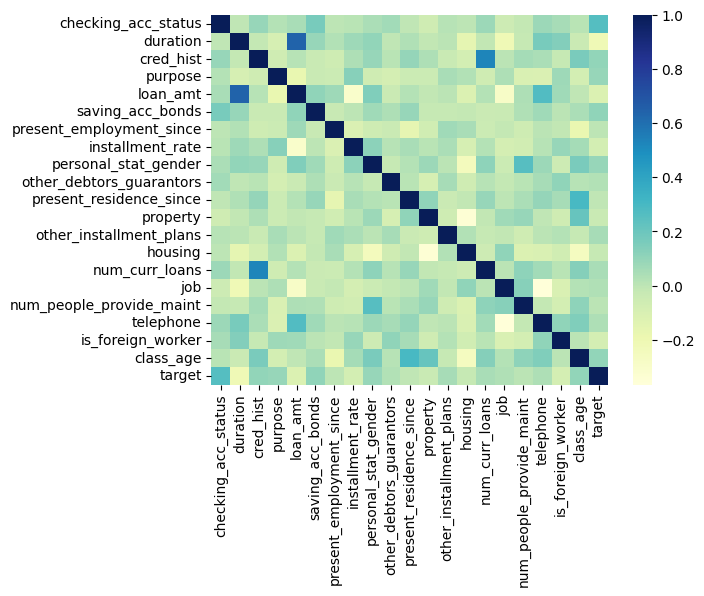

In [177]:
print(credit.corr())
heatmap_credit = sns.heatmap(credit.corr(),cmap="YlGnBu")
plt.show()


## 3- LOGISTIC REGRESSION

In [178]:
y = credit.iloc[:,-1].values
x = credit.iloc[:,0:-1]

In [181]:
credit_numerical = credit.loc[:,["loan_amt","duration"]]
credit_numerical

,loan_amt,duration
0,7.063904,6
1,8.691315,48
2,7.647786,12
3,8.972337,42
4,8.490849,24
...,...,...
995,7.459339,12
996,8.257645,30
997,6.689599,12
998,7.520235,45


In [182]:
list_numerical = credit_numerical.columns
list_numerical

Index(['loan_amt', 'duration'], dtype='object')

In [183]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

In [184]:
scaler = StandardScaler()

In [185]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [186]:
x_train

,checking_acc_status,duration,cred_hist,purpose,loan_amt,saving_acc_bonds,present_employment_since,installment_rate,personal_stat_gender,other_debtors_guarantors,present_residence_since,property,other_installment_plans,housing,num_curr_loans,job,num_people_provide_maint,telephone,is_foreign_worker,class_age
29,1,60,1,0,8.829958,1,0,3,3,2,4,3,1,1,2,1,1,1,1,2
535,0,21,4,4,7.748891,1,1,2,1,2,1,0,1,2,1,1,1,0,1,0
695,3,6,0,2,7.119636,2,2,2,3,2,4,1,1,2,1,1,1,0,1,1
557,3,21,2,1,8.517793,4,2,1,0,2,4,1,0,1,2,1,1,1,1,0
836,3,12,0,7,6.786717,4,2,4,0,2,2,0,1,1,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,3,18,3,1,8.773075,1,0,2,3,2,4,3,0,1,2,0,2,1,1,1
270,3,18,0,1,7.886833,4,3,4,3,2,3,1,1,1,1,1,1,0,0,0
860,3,24,4,2,8.666303,0,2,4,3,2,2,2,1,1,2,1,1,0,1,0
435,2,12,0,7,7.302496,4,2,2,2,2,1,2,1,1,1,1,1,1,1,0


In [187]:
col_names = []
for i in credit.columns:
    col_names.append(i)
col_names = col_names[:-1]
col_target = ["target"]

In [188]:
x_train = pd.DataFrame(x_train, columns=col_names)
y_train = pd.DataFrame(y_train, columns = col_target)
x_test = pd.DataFrame(x_test, columns = col_names)
y_test = pd.DataFrame(y_test, columns = col_target)

In [189]:
x_train[list_numerical] = scaler.fit_transform(x_train[list_numerical])
x_test[list_numerical] = scaler.fit_transform(x_test[list_numerical])

In [190]:
Classifier = LogisticRegression()
Classifier.fit(x_train, y_train.values.ravel())
y_predict = Classifier.predict(x_test)
y_predict

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1])

In [191]:

coeffs = pd.DataFrame(
    [
        ['intercept'] + list(x_train.columns),
        list(Classifier.intercept_) + list(Classifier.coef_[0])
    ],
).transpose().set_index(0)

coeffs.columns = ['weight']
coeffs.index.name = 'feature'
coeffs

,weight
feature,
intercept,0.365421
checking_acc_status,0.59141
duration,-0.325859
cred_hist,0.146875
purpose,0.10888
loan_amt,-0.237773
saving_acc_bonds,0.133361
present_employment_since,-0.014489
installment_rate,-0.250722


In [192]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score

In [193]:
cm_lr = confusion_matrix(y_predict, y_test)
cm_lr

array([[ 25,  16],
       [ 34, 125]], dtype=int64)

In [194]:
#sensitivity
true_positive_lr = cm_lr[1,1]
false_negative_lr = cm_lr[0,1]
sensitivity_lr = true_positive_lr/(true_positive_lr + false_negative_lr)
sensitivity_lr

0.8865248226950354

In [195]:
#specificity
true_negative_lr = cm_lr[0,0]
false_positive_lr= cm_lr[1,0]
specificity_lr = true_negative_lr/(true_negative_lr+false_positive_lr)
specificity_lr

0.423728813559322

In [196]:
accuracy_lr = accuracy_score(y_test,y_predict)
print("The accuracy of the model is: ", accuracy_lr)
print(classification_report(y_test,y_predict))

The accuracy of the model is:  0.75
              precision    recall  f1-score   support

           0       0.61      0.42      0.50        59
           1       0.79      0.89      0.83       141

    accuracy                           0.75       200
   macro avg       0.70      0.66      0.67       200
weighted avg       0.73      0.75      0.73       200



In [197]:
#precision
precision_lr = true_positive_lr/(true_positive_lr + false_positive_lr)
print("Precision: ", precision_lr)

Precision:  0.7861635220125787


In [198]:
#f1 score
f1_score_lr = 2 * (precision_lr * sensitivity_lr)/(precision_lr + sensitivity_lr)
print("F1 score: ", f1_score_lr)

F1 score:  0.8333333333333334


In [199]:
pred_probabilities =  Classifier.predict_proba(x_test)
pred_probabilities

array([[0.51182621, 0.48817379],
       [0.33777052, 0.66222948],
       [0.44087842, 0.55912158],
       [0.57211636, 0.42788364],
       [0.17347965, 0.82652035],
       [0.33500398, 0.66499602],
       [0.27440928, 0.72559072],
       [0.2850473 , 0.7149527 ],
       [0.07426557, 0.92573443],
       [0.34378306, 0.65621694],
       [0.21357561, 0.78642439],
       [0.61954425, 0.38045575],
       [0.24155848, 0.75844152],
       [0.83757115, 0.16242885],
       [0.64305382, 0.35694618],
       [0.26004248, 0.73995752],
       [0.23831548, 0.76168452],
       [0.07331775, 0.92668225],
       [0.62570659, 0.37429341],
       [0.47996581, 0.52003419],
       [0.15211095, 0.84788905],
       [0.43719638, 0.56280362],
       [0.1258017 , 0.8741983 ],
       [0.03400065, 0.96599935],
       [0.05562195, 0.94437805],
       [0.39784964, 0.60215036],
       [0.43938059, 0.56061941],
       [0.85145485, 0.14854515],
       [0.17946838, 0.82053162],
       [0.17155908, 0.82844092],
       [0.

In [200]:
y_test

,target
0,0
1,1
2,1
3,1
4,1
...,...
195,1
196,0
197,1
198,1


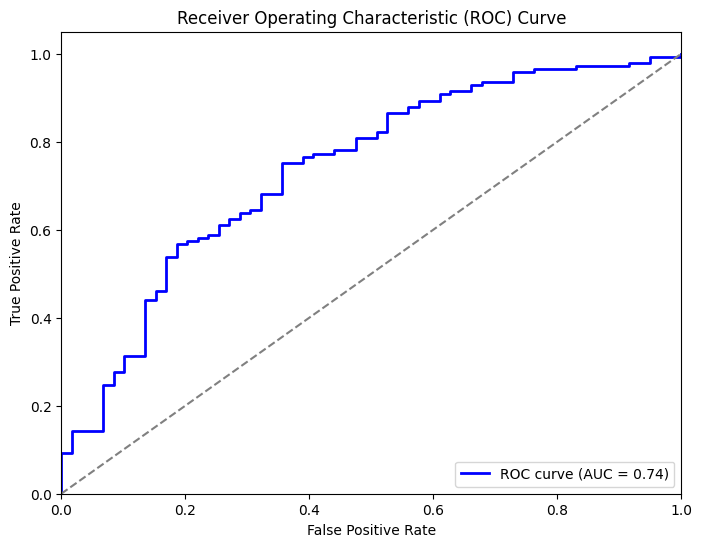

In [201]:
fpr, tpr, thresholds = roc_curve(y_test, pred_probabilities[:,1])

# Calculate AUC score
auc = roc_auc_score(y_test, pred_probabilities[:,1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

We want to minimize FNR because we lose money.

In [202]:
#Calculating probabilities for training and tetst splits
y_train_pred = Classifier.predict_proba(x_train)
y_test_pred = Classifier.predict_proba(x_test)

In [203]:
#Calculating maximu likelihood for training and test sets
max_le_vector_train = np.log(np.where (y_train == 1, y_train_pred[:,1], y_train_pred[:,0]))
max_le_vector_test = np.log(np.where (y_test == 1, y_test_pred[:,1],y_test_pred[:,0]))

In [204]:
#Calculating the cost function from the maximum likelihood
cost_function_training = np.negative(np.sum(max_le_vector_train)/len(y_train))
cost_function_test = np.negative(np.sum(max_le_vector_test)/len(y_test))

In [205]:
# Printing the results
print('Cost function training set =', cost_function_training)
print('Cost function test set =', cost_function_test)

Cost function training set = 574.7052113896199
Cost function test set = 142.66621761811774


The optimal threshold z is  0.4967481212716773
The FPR rate according the optimal threshold z is  0.576271186440678
The FNR rate according the optimal threshold z is  0.1063829787234043


Text(0.5, 1.0, 'Optimal threshold')

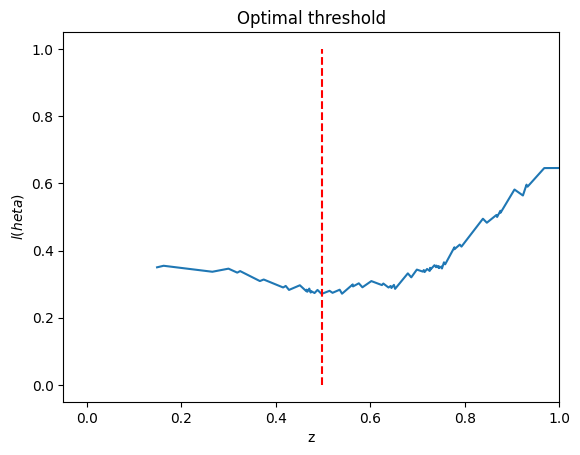

In [206]:
theta = 0.35
l = theta * fpr + (1-theta)*(1-tpr)
l_z_optimal = np.argmax(-l, axis = 0)
print("The optimal threshold z is ",thresholds[l_z_optimal])
print("The FPR rate according the optimal threshold z is ",fpr[l_z_optimal])
print("The FNR rate according the optimal threshold z is ",(1-tpr[l_z_optimal]))

plt.plot(thresholds,l)
plt.vlines(thresholds[l_z_optimal],0,1,'red','dashed')
plt.xlabel("z")
plt.ylabel("$l(\theta)$")
plt.xlim((-0.05,1))
plt.ylim((-0.05,1.05))
plt.title("Optimal threshold")

## - RIDGE 

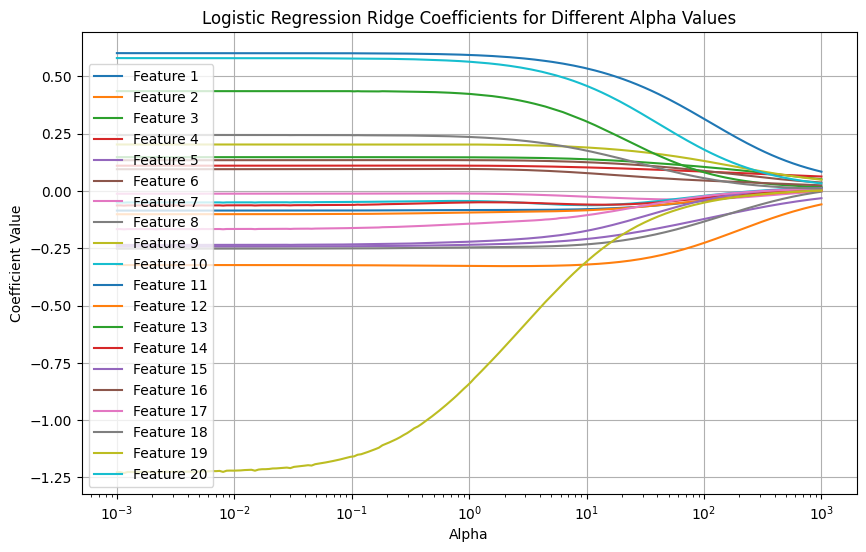

In [207]:
alpha_values = np.logspace(-3, 3, 200)  # Example range from 10^-3 to 10^3

# Initialize lists to store coefficients for each alpha
coef_list = []

# Iterate over each alpha value
for alpha in alpha_values:
    # Create logistic regression model with Lasso regularization
    log_reg_ridge = LogisticRegression(penalty='l2', C=1/alpha, solver='liblinear', random_state=42)
    
    # Fit the model
    log_reg_ridge.fit(x_train, y_train.values.ravel())
    
    # Append coefficients to the list
    coef_list.append(log_reg_ridge.coef_.flatten())

# Convert coefficients to NumPy array
coef_array = np.array(coef_list)

# Plot the coefficients for each alpha value
plt.figure(figsize=(10, 6))
for i in range(coef_array.shape[1]):
    plt.plot(alpha_values, coef_array[:, i], label=f'Feature {i+1}')

plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression Ridge Coefficients for Different Alpha Values')
plt.legend()
plt.grid(True)
plt.show()

In [208]:
alpha_values = [0.001, 0.01, 0.1, 1.0, 10.0]

# Set up the parameter grid for grid search
param_grid = {'C': [1 / alpha for alpha in alpha_values]}  # C is the inverse of alpha

# Perform cross-validated grid search
grid_search = GridSearchCV(estimator=log_reg_ridge, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train.values.ravel())

# Get the best alpha value
best_alpha_ridge = 1 / grid_search.best_params_['C']

print("Best alpha:", best_alpha_ridge)

Best alpha: 10.0


In [209]:
ridge=LogisticRegression(penalty = "l2", C =1/best_alpha_ridge,solver='liblinear', random_state=42)
ridge.fit(x_train,y_train)
# DataFrame with corresponding feature and its respective coefficients
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(x_train.columns),
        list(ridge.intercept_) + list(ridge.coef_[0])
    ]
).transpose().set_index(0)
coeffs

coeff_lasso_table = pd.DataFrame(coeffs)

coeff_lasso_table.columns = ["weights"]
coeff_lasso_table.index.name = "feature"
coeff_lasso_table


c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,weights
feature,
intercept,-0.029597
checking_acc_status,0.534623
duration,-0.321293
cred_hist,0.138179
purpose,0.102623
loan_amt,-0.209881
saving_acc_bonds,0.125228
present_employment_since,-0.025088
installment_rate,-0.233232


Here, we can see a positive relationship of class age (more older is the person, it's more likely that this one could be a good client),checking account status, credit history with the target variable. Instead, a negative ones between duration(when the loan lasts more, it's more likely that the client default), loan amount(more is the amount of the loan, more is the probability to default), guarantors(this is strange, maybe this happens because the most of the clients haven't a guarantor or a co-applicant),property and the target variable.

In [210]:
y_hat_ridge = ridge.predict(x_test)
accuracy_ridge = accuracy_score(y_test, y_hat_ridge)
print("Accuracy: ", accuracy_ridge)

Accuracy:  0.755


In [211]:
n = len(y_test)
k = x_test.shape[1]+1
aic = 2 * k - 2*accuracy_ridge * n
print("AIC: ", aic)

# Calculate BIC
n_samples, n_features = x_train.shape
n_params = n_features + 1  # Number of features plus one for the intercept

bic_ridge = -2 * accuracy_ridge + n_params * np.log(n_samples)

print("BIC:", bic_ridge)


AIC:  -260.0
BIC: 138.86684628102648


## - LASSO 

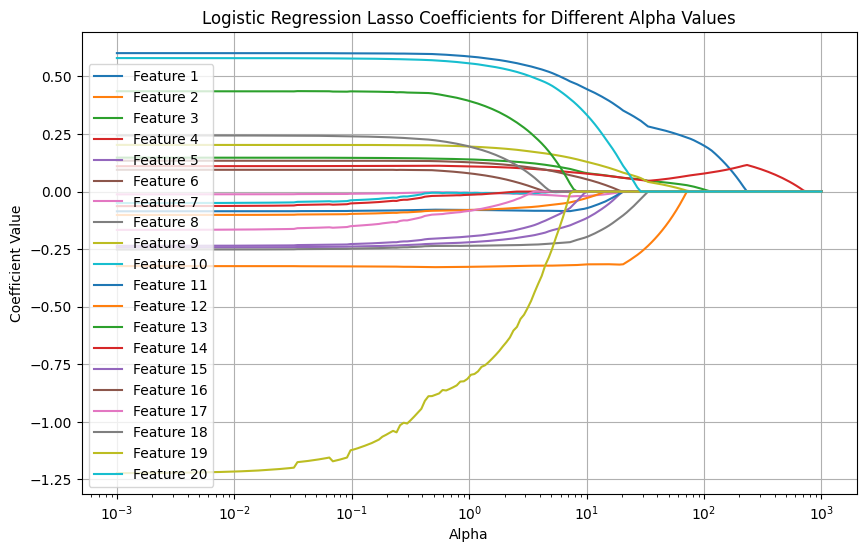

In [212]:
alpha_values = np.logspace(-3, 3, 200)  # Example range from 10^-3 to 10^3

# Initialize lists to store coefficients for each alpha
coef_list = []

# Iterate over each alpha value
for alpha in alpha_values:
    # Create logistic regression model with Lasso regularization
    log_reg_lasso = LogisticRegression(penalty='l1', C=1/alpha, solver='liblinear', random_state=42)
    
    # Fit the model
    log_reg_lasso.fit(x_train, y_train.values.ravel())
    
    # Append coefficients to the list
    coef_list.append(log_reg_lasso.coef_.flatten())

# Convert coefficients to NumPy array
coef_array = np.array(coef_list)

# Plot the coefficients for each alpha value
plt.figure(figsize=(10, 6))
for i in range(coef_array.shape[1]):
    plt.plot(alpha_values, coef_array[:, i], label=f'Feature {i+1}')

plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression Lasso Coefficients for Different Alpha Values')
plt.legend()
plt.grid(True)
plt.show()

In [213]:
alpha_values = [0.001, 0.01, 0.1, 1.0, 10.0]

# Set up the parameter grid for grid search
param_grid = {'C': [1 / alpha for alpha in alpha_values]}  # C is the inverse of alpha

# Perform cross-validated grid search
grid_search = GridSearchCV(estimator=log_reg_lasso, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train.values.ravel())

# Get the best alpha value
best_alpha_lasso = 1 / grid_search.best_params_['C']

print("Best alpha:", best_alpha_lasso)

Best alpha: 10.0


In [214]:

lasso=LogisticRegression(penalty = "l1", C =1/best_alpha_lasso,solver='liblinear', random_state=42)
lasso.fit(x_train,y_train.values.ravel())
# DataFrame with corresponding feature and its respective coefficients
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(x_train.columns),
        list(lasso.intercept_) + list(lasso.coef_[0])
    ]
).transpose().set_index(0)
coeffs

coeff_lasso_table = pd.DataFrame(coeffs)

coeff_lasso_table.columns = ["weights"]
coeff_lasso_table.index.name = "feature"
coeff_lasso_table



,weights
feature,
intercept,0.0
checking_acc_status,0.445012
duration,-0.316067
cred_hist,0.079899
purpose,0.077893
loan_amt,-0.115885
saving_acc_bonds,0.053497
present_employment_since,-0.0194
installment_rate,-0.197693


Here, the model suggests that we could drop some features in order to do some feature selection, like telephone, if the worker is foreign, housing, guarantors, installment plans, job, number of currency loans. Also here we can see a positive relationship of class age, credit history and account status. And negative ones of property, loan amount, duration.

In [215]:
lasso_logreg = LogisticRegression(penalty='l1', solver='saga', l1_ratio=1, C=1/best_alpha_lasso)
lasso_logreg.fit(x_train, y_train.values.ravel())

c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


LogisticRegression(C=0.1, l1_ratio=1, penalty='l1', solver='saga')

In [216]:
y_hat_lasso = lasso_logreg.predict(x_test)
accuracy_lasso = accuracy_score(y_test, y_hat_lasso)
print("Accuracy: ", accuracy_lasso)

Accuracy:  0.755


In [217]:
n = len(y_test)
k = x_test.shape[1]+1
aic_lasso = 2 * k - 2*accuracy_lasso * n
print("AIC: ", aic_lasso)


# Calculate BIC
n_samples, n_features = x_train.shape
n_params = n_features + 1  # Number of features plus one for the intercept

bic_lasso = -2 * accuracy_lasso + n_params * np.log(n_samples)

print("BIC:", bic_lasso)


AIC:  -260.0
BIC: 138.86684628102648


In [218]:
cf_lasso = confusion_matrix(y_test,y_hat_lasso)
cf_lasso

array([[ 17,  42],
       [  7, 134]], dtype=int64)

In [219]:
#sensitivity
true_positives_lasso = cf_lasso[1,1]
false_negative_lasso = cf_lasso[0,1]
sensitivity_lasso= true_positives_lasso/(true_positives_lasso + false_negative_lasso)
print("Sensitivity: ", sensitivity_lasso)

Sensitivity:  0.7613636363636364


In [220]:
#specificifty
true_negatives_lasso = cf_lasso[0,0]
false_positive_lasso = cf_lasso[1,0]
specificity_lasso = true_negatives_lasso/(true_negatives_lasso+ false_positive_lasso)
print("Specificity: ", specificity_lasso)

Specificity:  0.7083333333333334


In [221]:
#precision
precision_lasso = true_positives_lasso/(true_positives_lasso+false_positive_lasso)
print("Precision: ", precision_lasso)

Precision:  0.950354609929078


In [222]:
#f1 score
f1_score_lasso = 2 * (precision_lasso * sensitivity_lasso)/(precision_lasso+sensitivity_lasso)
print("F1 score: ", f1_score_lasso)

F1 score:  0.8454258675078864


In [223]:
lasso_probs = lasso_logreg.predict_proba(x_test)
lasso_probs

array([[0.43189821, 0.56810179],
       [0.39198107, 0.60801893],
       [0.40313304, 0.59686696],
       [0.45772011, 0.54227989],
       [0.21698034, 0.78301966],
       [0.2870589 , 0.7129411 ],
       [0.32701851, 0.67298149],
       [0.23279279, 0.76720721],
       [0.16224754, 0.83775246],
       [0.28984622, 0.71015378],
       [0.19796719, 0.80203281],
       [0.55661577, 0.44338423],
       [0.26573507, 0.73426493],
       [0.75214014, 0.24785986],
       [0.55794883, 0.44205117],
       [0.30727041, 0.69272959],
       [0.19658561, 0.80341439],
       [0.11034204, 0.88965796],
       [0.45390493, 0.54609507],
       [0.41346439, 0.58653561],
       [0.22696688, 0.77303312],
       [0.39076533, 0.60923467],
       [0.14101569, 0.85898431],
       [0.05583376, 0.94416624],
       [0.06720394, 0.93279606],
       [0.40571123, 0.59428877],
       [0.38497066, 0.61502934],
       [0.77590569, 0.22409431],
       [0.18469421, 0.81530579],
       [0.17360549, 0.82639451],
       [0.

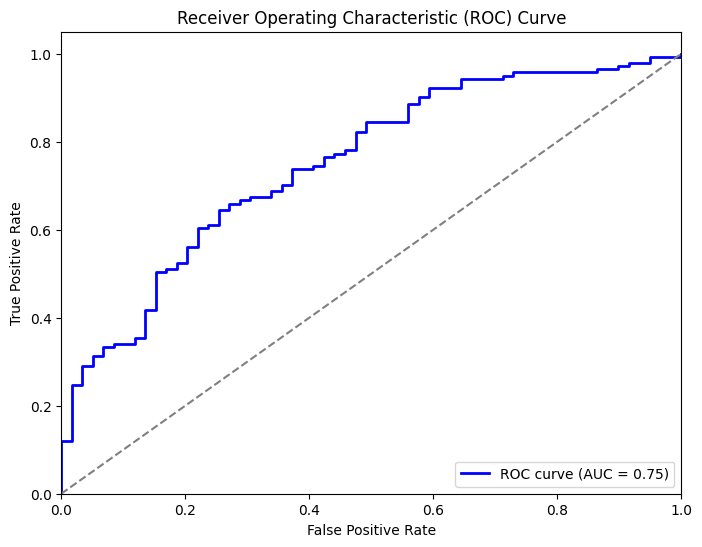

In [224]:
fpr, tpr, thresholds = roc_curve(y_test, lasso_probs[:,1])

# Calculate AUC score
auc = roc_auc_score(y_test, lasso_probs[:,1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## - ELASTIC NET

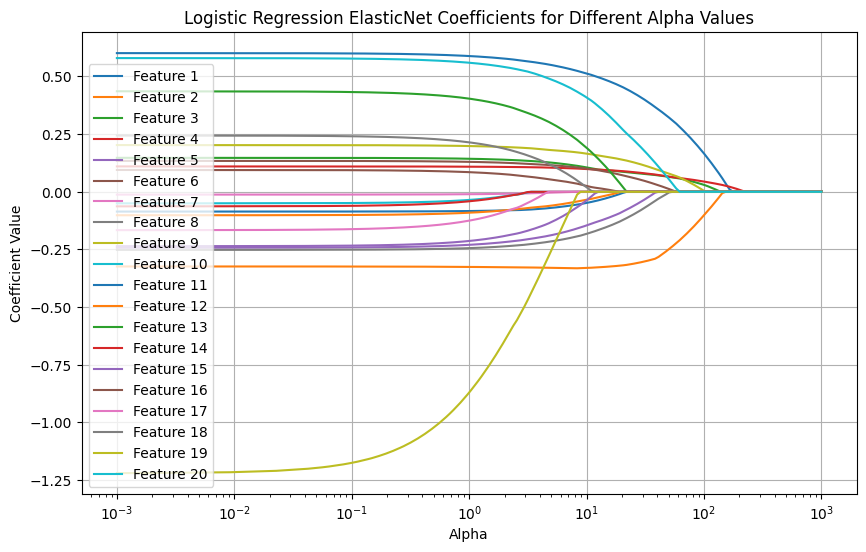

In [225]:
alpha_values = np.logspace(-3, 3, 200)  # Example range from 10^-3 to 10^3

# Initialize lists to store coefficients for each alpha
coef_list = []

# Iterate over each alpha value
for alpha in alpha_values:
    # Create logistic regression model with Lasso regularization
    log_reg_elnet = LogisticRegression(penalty='elasticnet', solver = "saga", C=1/alpha, l1_ratio=0.5, max_iter=1000)
    
    log_reg_elnet.fit(x_train, y_train.values.ravel())
    
    # Append coefficients to the list
    coef_list.append(log_reg_elnet.coef_.flatten())

# Convert coefficients to NumPy array
coef_array = np.array(coef_list)

# Plot the coefficients for each alpha value
plt.figure(figsize=(10, 6))
for i in range(coef_array.shape[1]):
    plt.plot(alpha_values, coef_array[:, i], label=f'Feature {i+1}')

plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression ElasticNet Coefficients for Different Alpha Values')
plt.legend()
plt.grid(True)
plt.show()

In [226]:
# Create logistic regression model with Elastic Net regularization and perform cross-validation
log_reg_elnet = LogisticRegressionCV(
    Cs=[1 / alpha for alpha in alpha_values],  # Cs is the inverse of alpha
    penalty='elasticnet',  # Use Elastic Net regularization
    l1_ratios=[0.5],  # Set the ratio of L1 to L2 regularization (0.5 for balanced)
    solver='saga',  # Solver supporting Elastic Net regularization
    cv=5,  # 5-fold cross-validation
    max_iter=1000,  # Maximum number of iterations
    random_state=42  # Random state for reproducibility
)

# Fit the model to the training data
log_reg_elnet.fit(x_train, y_train.values.ravel())

# Get the best alpha value
best_alpha_elnet = 1 / log_reg_elnet.C_

print("Best alpha:", best_alpha_elnet)

Best alpha: [11.75849554]


In [227]:
y_hat_elnet = log_reg_elnet.predict(x_test)
accuracy_elnet = accuracy_score(y_test, y_hat_elnet)
print("Accuracy: ", accuracy_elnet)

Accuracy:  0.76


In [228]:
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(x_train.columns),
        list(log_reg_elnet.intercept_) + list(log_reg_elnet.coef_[0])
    ]
).transpose().set_index(0)
coeffs

coeff_elnet_table = pd.DataFrame(coeffs)

coeff_elnet_table.columns = ["weights"]
coeff_elnet_table.index.name = "feature"
coeff_elnet_table

,weights
feature,
intercept,-0.73388
checking_acc_status,0.501823
duration,-0.328236
cred_hist,0.098684
purpose,0.097243
loan_amt,-0.133032
saving_acc_bonds,0.095617
present_employment_since,0.0
installment_rate,-0.170735


Here, the model suggests that we could drop guarantors, foreign worker, telephone, housing, present employment. We don't see a significative difference in the relationships of the variable in comparison to the other two models.

**Elastic net with the best alpha**

In [229]:
#aic and bic 

n = len(y_test)
k = x_test.shape[1]+1
aic_elnet = 2 * k - 2*accuracy_elnet * n
print("AIC: ", aic_elnet)

n_samples, n_features = x_train.shape
n_params = n_features + 1  # Number of features plus one for the intercept

# Calculate BIC
bic_elnet = -2 * accuracy_elnet + n_params * np.log(n_samples)

print("BIC:", bic_elnet)


AIC:  -262.0
BIC: 138.85684628102646


In the end, looking at the AIC and BIC score, this suggests that between lasso, ridge and elastic net, the best one is the lasso.

 ## 4  RANDOM FOREST

In [230]:
select_from_model_rfc = SelectFromModel(RandomForestClassifier(n_estimators=200))
select_from_model_rfc.fit(x_train,y_train.values.ravel())
select_from_model_rfc.get_support()

array([ True,  True,  True,  True,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [231]:

selected_features = x_train.columns[(select_from_model_rfc.get_support())]
len(selected_features)

6

In [232]:
selected_features

Index(['checking_acc_status', 'duration', 'cred_hist', 'purpose', 'loan_amt',
       'present_employment_since'],
      dtype='object')

In [233]:
rfc = RandomForestClassifier(n_estimators=400, max_depth = 10)
rfc.fit(x_train,y_train.values.ravel())
y_hat_rcf = rfc.predict(x_test)

In [234]:
from sklearn import metrics
print("ACCURACY OF RANDOM FOREST MODEL: ", metrics.accuracy_score(y_test,y_hat_rcf))

ACCURACY OF RANDOM FOREST MODEL:  0.755


In [235]:
rf_cl = RandomForestClassifier()
rf_cl.fit(x_train,y_train.values.ravel())

RandomForestClassifier()

Note: 

.values will give the values in a numpy array (shape: (n,1))

.ravel will convert that array shape to (n, ) (i.e. flatten it)

In [236]:
pred_rf = rf_cl.predict(x_test)
pred_rf

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1])

In [237]:
feature_importance = pd.DataFrame(rf_cl.feature_importances_, index = col_names).sort_values(by=0, ascending=False)
feature_importance

,0
loan_amt,0.157507
duration,0.101022
checking_acc_status,0.100612
purpose,0.069137
cred_hist,0.058753
present_employment_since,0.058225
saving_acc_bonds,0.050579
property,0.049185
installment_rate,0.048709
present_residence_since,0.046366


In [238]:
n_estimators = np.linspace(100,500, int(500-100/200)+1,dtype=int)
max_features = ["auto","sqrt"]
max_depth = [1,5,10,15]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 9)]
min_samples_leaf = [1,2,3,4]
bootstrap = [True,False]
criterion = ["gini","entropy"]
random_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}

In [239]:
random_grid

{'n_estimators': array([100, 100, 101, 102, 103, 104, 104, 105, 106, 107, 108, 108, 109,
        110, 111, 112, 112, 113, 114, 115, 116, 116, 117, 118, 119, 120,
        120, 121, 122, 123, 124, 124, 125, 126, 127, 128, 128, 129, 130,
        131, 132, 132, 133, 134, 135, 136, 136, 137, 138, 139, 140, 140,
        141, 142, 143, 144, 144, 145, 146, 147, 148, 148, 149, 150, 151,
        152, 152, 153, 154, 155, 156, 156, 157, 158, 159, 160, 160, 161,
        162, 163, 164, 164, 165, 166, 167, 168, 168, 169, 170, 171, 172,
        172, 173, 174, 175, 176, 176, 177, 178, 179, 180, 180, 181, 182,
        183, 184, 184, 185, 186, 187, 188, 188, 189, 190, 191, 192, 192,
        193, 194, 195, 196, 196, 197, 198, 199, 200, 201, 201, 202, 203,
        204, 205, 205, 206, 207, 208, 209, 209, 210, 211, 212, 213, 213,
        214, 215, 216, 217, 217, 218, 219, 220, 221, 221, 222, 223, 224,
        225, 225, 226, 227, 228, 229, 229, 230, 231, 232, 233, 233, 234,
        235, 236, 237, 237, 238, 23

In [240]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf_cl,
                               param_distributions=random_grid,
                               n_iter = 30, cv = 5,
                               verbose = 2,
                               random_state=42, 
                               n_jobs = 4)

In [241]:
rf_random.fit(x_train, y_train.values.ravel())

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=30,
                   n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 5, 10, 15],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': array([100, 100, 101, 102, 103, 104, 104, 105, 106, 107, 108, 108,...
       433, 434, 435, 435, 436, 437, 438, 439, 439, 440, 441, 442, 443,
       443, 444, 445, 446, 447, 447, 448, 449, 450, 451, 451, 452, 453,
       454, 455, 455, 456, 457, 458, 459, 459, 460, 461, 462, 463, 463,
       464, 465, 466, 467, 467, 468, 469, 470, 471, 471, 472, 473, 474,
       475, 475, 476, 477, 478, 479, 479, 480, 481, 482, 483, 483, 484,
       485, 486, 487, 487, 488, 489, 490, 491, 491, 492, 493, 494, 495,
       495, 496, 497, 498, 499, 500])},
                   random_state=42, verbose=2)

In [242]:
rf_random.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2,
                       min_samples_split=9, n_estimators=233)

In [243]:
print(rf_random.score(x_train,y_train.values.ravel()))
print(rf_random.score(x_test,y_test.values.ravel()))

0.92875
0.755


In [244]:
rf_best_random= RandomForestClassifier(criterion="entropy", max_depth=15, min_samples_leaf=2,min_samples_split=9,n_estimators=233)
rf_best_random.fit(x_train,y_train.values.ravel())

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2,
                       min_samples_split=9, n_estimators=233)

In [245]:
y_hat_random_best = rf_best_random.predict(x_test)
y_hat_random_best

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1])

In [246]:
accuracy_best_random = accuracy_score(y_test, y_hat_random_best)
accuracy_best_random

0.775

In [247]:
print(rf_best_random.score(x_train,y_train.values.ravel()))
print(rf_best_random.score(x_test,y_test.values.ravel()))

0.92625
0.775


In [248]:
rf_best_random_probs = rf_best_random.predict_proba(x_test)
rf_best_random_probs

array([[0.30397076, 0.69602924],
       [0.38452281, 0.61547719],
       [0.49064166, 0.50935834],
       [0.41255166, 0.58744834],
       [0.24264721, 0.75735279],
       [0.33049308, 0.66950692],
       [0.1424676 , 0.8575324 ],
       [0.4287132 , 0.5712868 ],
       [0.16264179, 0.83735821],
       [0.31633499, 0.68366501],
       [0.19480564, 0.80519436],
       [0.62212698, 0.37787302],
       [0.19915873, 0.80084127],
       [0.77562637, 0.22437363],
       [0.7326042 , 0.2673958 ],
       [0.28088315, 0.71911685],
       [0.09880035, 0.90119965],
       [0.09699919, 0.90300081],
       [0.42765212, 0.57234788],
       [0.35768197, 0.64231803],
       [0.28455162, 0.71544838],
       [0.33427289, 0.66572711],
       [0.12356257, 0.87643743],
       [0.01969743, 0.98030257],
       [0.05721774, 0.94278226],
       [0.47715873, 0.52284127],
       [0.59439471, 0.40560529],
       [0.46260976, 0.53739024],
       [0.28371676, 0.71628324],
       [0.16254723, 0.83745277],
       [0.

In [249]:
cf_best_random = confusion_matrix(y_test,y_hat_random_best )
cf_best_random

array([[ 20,  39],
       [  6, 135]], dtype=int64)

In [250]:
#sensitivity
true_positives_rf = cf_best_random[1,1]
false_negative_rf = cf_best_random[0,1]
sensitivity_best_rf = true_positives_rf/(true_positives_rf + false_negative_rf)
print("Sensitivity: ", sensitivity_best_rf)

Sensitivity:  0.7758620689655172


In [251]:
#specificifty
true_negatives_rf = cf_best_random[0,0]
false_positive_rf = cf_best_random[1,0]
specificity_best_rf = true_negatives_rf/(true_negatives_rf+ false_positive_rf)
print("Specificity: ", specificity_best_rf)

Specificity:  0.7692307692307693


In [252]:
#precision
precision_best_rf = true_positives_rf/(true_positives_rf+false_positive_rf)
print("Precision: ", precision_best_rf)

Precision:  0.9574468085106383


In [253]:
#f1 score
f1_score_best_rf = 2 * (precision_best_rf * sensitivity_best_rf)/(precision_best_rf+sensitivity_best_rf)
print("F1 score: ", f1_score_best_rf)

F1 score:  0.8571428571428572


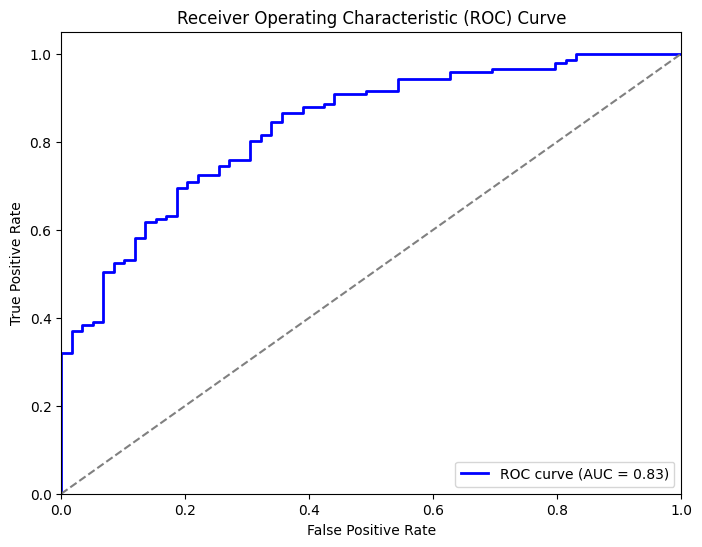

In [254]:
fpr, tpr, thresholds = roc_curve(y_test, rf_best_random_probs[:,1])

# Calculate AUC score
auc = roc_auc_score(y_test, rf_best_random_probs[:,1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# - Random Forest with the selected features 

In [255]:
features = []
for i in selected_features:
    features.append(i)
features

['checking_acc_status',
 'duration',
 'cred_hist',
 'purpose',
 'loan_amt',
 'present_employment_since']

In [256]:
new_data = credit[features]
new_data["target"] = credit["target"]
new_data

C:\Users\Hp\AppData\Local\Temp\ipykernel_6192\2502640321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["target"] = credit["target"]


,checking_acc_status,duration,cred_hist,purpose,loan_amt,present_employment_since,target
0,1,6,4,7,7.063904,0,1
1,2,48,0,7,8.691315,2,0
2,3,12,4,4,7.647786,3,1
3,1,42,0,5,8.972337,3,1
4,1,24,1,1,8.490849,2,0
...,...,...,...,...,...,...,...
995,3,12,0,5,7.459339,3,1
996,1,30,0,2,8.257645,2,1
997,3,12,0,7,6.689599,0,1
998,1,45,0,7,7.520235,2,0


In [257]:
x_train_rf, x_test_rf, y_train_rf, y_test_rf = train_test_split(x,y, test_size=0.2, random_state=42)

In [258]:
x_train_rf = pd.DataFrame(x_train, columns=col_names)
y_train_rf = pd.DataFrame(y_train, columns = col_target)
x_test_rf = pd.DataFrame(x_test, columns = col_names)
y_test_rf = pd.DataFrame(y_test, columns = col_target)

In [259]:
rf_random_selected_features = RandomizedSearchCV(estimator = rf_cl,
                               param_distributions=random_grid,
                               n_iter = 30, cv = 5,
                               verbose = 2,
                               random_state=42, 
                               n_jobs = 4)

In [260]:
rf_random_selected_features

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=30,
                   n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 5, 10, 15],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': array([100, 100, 101, 102, 103, 104, 104, 105, 106, 107, 108, 108,...
       433, 434, 435, 435, 436, 437, 438, 439, 439, 440, 441, 442, 443,
       443, 444, 445, 446, 447, 447, 448, 449, 450, 451, 451, 452, 453,
       454, 455, 455, 456, 457, 458, 459, 459, 460, 461, 462, 463, 463,
       464, 465, 466, 467, 467, 468, 469, 470, 471, 471, 472, 473, 474,
       475, 475, 476, 477, 478, 479, 479, 480, 481, 482, 483, 483, 484,
       485, 486, 487, 487, 488, 489, 490, 491, 491, 492, 493, 494, 495,
       495, 496, 497, 498, 499, 500])},
                   random_state=42, verbose=2)

In [261]:
rf_random_selected_features.fit(x_train, y_train.values.ravel())

Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=30,
                   n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 5, 10, 15],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': array([100, 100, 101, 102, 103, 104, 104, 105, 106, 107, 108, 108,...
       433, 434, 435, 435, 436, 437, 438, 439, 439, 440, 441, 442, 443,
       443, 444, 445, 446, 447, 447, 448, 449, 450, 451, 451, 452, 453,
       454, 455, 455, 456, 457, 458, 459, 459, 460, 461, 462, 463, 463,
       464, 465, 466, 467, 467, 468, 469, 470, 471, 471, 472, 473, 474,
       475, 475, 476, 477, 478, 479, 479, 480, 481, 482, 483, 483, 484,
       485, 486, 487, 487, 488, 489, 490, 491, 491, 492, 493, 494, 495,
       495, 496, 497, 498, 499, 500])},
                   random_state=42, verbose=2)

In [262]:
rf_random_selected_features.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=15, max_features='auto',
                       min_samples_leaf=2, min_samples_split=6,
                       n_estimators=336)

In [263]:
rf_best_random= RandomForestClassifier(bootstrap=False, criterion="entropy", max_depth=10, max_features="auto",min_samples_leaf=4,min_samples_split=9,n_estimators=444)
rf_best_random.fit(x_train,y_train.values.ravel())

c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=10,
                       max_features='auto', min_samples_leaf=4,
                       min_samples_split=9, n_estimators=444)

In [264]:
y_pred_rf = rf_random_selected_features.predict(x_test)
y_pred_rf

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1])

In [265]:
accuracy_random_selected_features = accuracy_score(y_test,y_pred_rf)
accuracy_random_selected_features

0.76

In [266]:
type(y_train_rf)

pandas.core.frame.DataFrame

In [267]:
print("Accuracy on training set: ",rf_random_selected_features.score(x_train,y_train_rf))
print("Accuracy on test set: ", rf_random_selected_features.score(x_test,y_test_rf))

Accuracy on training set:  0.94875
Accuracy on test set:  0.76


In [268]:
y_pred_probs_rf = rf_random_selected_features.predict_proba(x_test)
y_pred_probs_rf

array([[0.29158734, 0.70841266],
       [0.39185632, 0.60814368],
       [0.50317721, 0.49682279],
       [0.39368315, 0.60631685],
       [0.23008314, 0.76991686],
       [0.37516917, 0.62483083],
       [0.10256097, 0.89743903],
       [0.44488852, 0.55511148],
       [0.19073527, 0.80926473],
       [0.27112918, 0.72887082],
       [0.19547755, 0.80452245],
       [0.58812981, 0.41187019],
       [0.19822957, 0.80177043],
       [0.78503917, 0.21496083],
       [0.75249011, 0.24750989],
       [0.28648151, 0.71351849],
       [0.11370386, 0.88629614],
       [0.10555051, 0.89444949],
       [0.4778856 , 0.5221144 ],
       [0.35605144, 0.64394856],
       [0.25910658, 0.74089342],
       [0.25914998, 0.74085002],
       [0.14873168, 0.85126832],
       [0.01602891, 0.98397109],
       [0.05333217, 0.94666783],
       [0.48161802, 0.51838198],
       [0.57829951, 0.42170049],
       [0.47422917, 0.52577083],
       [0.25519674, 0.74480326],
       [0.13969162, 0.86030838],
       [0.

In [269]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix_rf)

Confusion Matrix:
[[ 20  39]
 [  9 132]]


In [270]:
#sensitivity
true_positives_rf = conf_matrix_rf[1,1]
false_negative_rf = conf_matrix_rf[0,1]
sensitivity_rf = true_positives_rf/(true_positives_rf + false_negative_rf)
print("Sensitivity: ", sensitivity_rf)

Sensitivity:  0.7719298245614035


In [271]:
#specificifty
true_negatives_rf = conf_matrix_rf[0,0]
false_positive_rf = conf_matrix_rf[1,0]
specificity_rf = true_negatives_rf/(true_negatives_rf+ false_positive_rf)
print("Specificity: ", specificity_rf)

Specificity:  0.6896551724137931


In [272]:
#precision
precision_rf = true_positives_rf/(true_positives_rf+false_positive_rf)
print("Precision: ", precision_rf)

Precision:  0.9361702127659575


In [273]:

#f1 score
f1_score_rf = 2 * (precision_rf * sensitivity_rf)/(precision_rf+sensitivity_rf)
print("F1 score: ", f1_score_rf)

F1 score:  0.8461538461538461


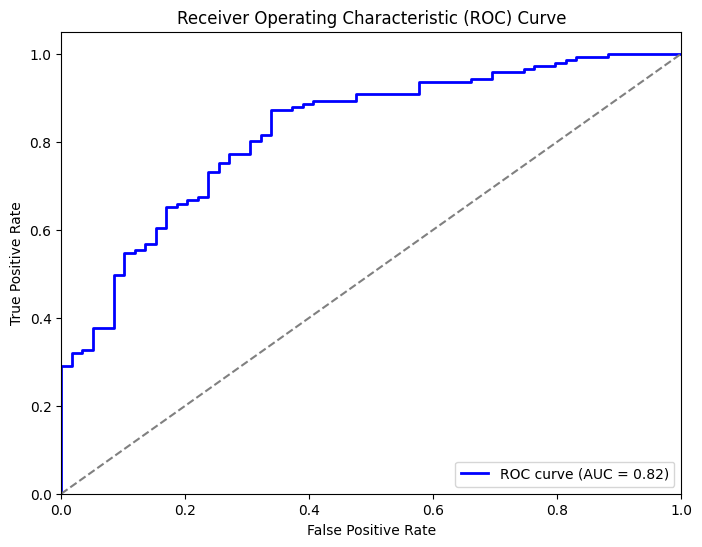

In [274]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs_rf[:,1])

# Calculate AUC score
auc = roc_auc_score(y_test, y_pred_probs_rf[:,1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## 5 XGBOOST

In [275]:
xgb_train = xgb.DMatrix(x_train, y_train, enable_categorical = True)
xgb_test = xgb.DMatrix(x_test, y_test, enable_categorical=True)

In [276]:
xgb_regr = xgb.XGBRegressor()
model_xgb_regr = xgb_regr.fit(x_train,y_train)
feature_importance_xgb = pd.DataFrame(model_xgb_regr.feature_importances_, index = col_names).sort_values(by=0, ascending=False)
feature_importance_xgb

,0
other_debtors_guarantors,0.105834
other_installment_plans,0.075986
checking_acc_status,0.069110
housing,0.060881
saving_acc_bonds,0.059594
purpose,0.052019
duration,0.051662
class_age,0.048747
cred_hist,0.048393
job,0.046689


In [277]:
sorted_idx = np.argsort(feature_importance_xgb)[::-1]

In [278]:
hyperparameters_grid_xg = {
    "n_estimators":[100,150,200,250,300,350,400,450,500],
    "learning_rate":[0.1,0.2,0.3,0.4,0.5],
    "max_depth":[1,2,3,4,5],
    "min_child_weight":[1,2,3]
}
hyperparameters_grid_xg

{'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500],
 'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
 'max_depth': [1, 2, 3, 4, 5],
 'min_child_weight': [1, 2, 3]}

In [279]:
grid_search = GridSearchCV(estimator=xgb.XGBRegressor(), param_grid=hyperparameters_grid_xg, cv = 5,scoring='neg_mean_squared_error', verbose=1)

In [280]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 675 candidates, totalling 3375 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_child_weight': [1, 2, 3],
                         'n_estimators': [100, 150, 200, 250, 300, 350, 400,
                                          450, 500]},
             scoring='neg_mean_squared_error', verbose=1)

In [281]:
print("Best parameters: ",grid_search.best_params_)

Best parameters:  {'learning_rate': 0.1, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 150}


In [282]:
best_model_xgboost = XGBClassifier(n_estimators=150,learning_rate = 0.1, max_depth=2,min_child_weight=3)

In [283]:
best_model_xgboost.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [284]:
y_pred_xgboost = best_model_xgboost.predict(x_test)
accuracy_xg_boost = accuracy_score(y_test,y_pred_xgboost)
print("Accuracy of xgboost model: ", accuracy_xg_boost)

Accuracy of xgboost model:  0.785


In [285]:
print("Classification Report:")
print(classification_report(y_test, y_pred_xgboost))

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.51      0.58        59
           1       0.81      0.90      0.86       141

    accuracy                           0.79       200
   macro avg       0.75      0.70      0.72       200
weighted avg       0.78      0.79      0.77       200



In [286]:
conf_matrix_xg = confusion_matrix(y_test, y_pred_xgboost)
print("Confusion Matrix:")
print(conf_matrix_xg)

Confusion Matrix:
[[ 30  29]
 [ 14 127]]


In [287]:
#sensitivity
true_positive_xg = conf_matrix_xg[1,1]
false_negative_xg = conf_matrix_xg[0,1]
sensitivity_xg = true_positive_xg/(true_positive_xg + false_negative_xg)
print("Sensitvity: ",sensitivity_xg)

Sensitvity:  0.8141025641025641


In [288]:
true_negative_xg = conf_matrix_xg[0,0]
false_positive_xg = conf_matrix_xg[1,0]
specificity_xg = true_negative_xg/(true_negative_xg+false_positive_xg)
print("Specificity: ", specificity_xg)

Specificity:  0.6818181818181818


In [289]:
precision_xg = true_positive_xg/(true_positive_xg+false_positive_xg)
print("Precision: ", precision_xg)

Precision:  0.900709219858156


In [290]:
f1_score_xg = 2 * (precision_xg * sensitivity_xg)/(precision_xg+sensitivity_xg)
print("F1 score: ", f1_score_xg)

F1 score:  0.8552188552188552


In [291]:
xg_pred_probabilities = best_model_xgboost.predict_proba(x_test)
xg_pred_probabilities

array([[0.29261833, 0.70738167],
       [0.4409845 , 0.5590155 ],
       [0.64628816, 0.35371187],
       [0.39039314, 0.60960686],
       [0.14607424, 0.85392576],
       [0.4348188 , 0.5651812 ],
       [0.13382202, 0.866178  ],
       [0.5234078 , 0.4765922 ],
       [0.20222574, 0.79777426],
       [0.24882823, 0.75117177],
       [0.23385096, 0.76614904],
       [0.675988  , 0.32401198],
       [0.13550174, 0.86449826],
       [0.9016895 , 0.09831044],
       [0.8023025 , 0.19769754],
       [0.27375513, 0.72624487],
       [0.0323661 , 0.9676339 ],
       [0.07477522, 0.9252248 ],
       [0.53189707, 0.4681029 ],
       [0.48340046, 0.51659954],
       [0.05976576, 0.94023424],
       [0.25486952, 0.7451305 ],
       [0.11411482, 0.8858852 ],
       [0.01457727, 0.98542273],
       [0.04034823, 0.95965177],
       [0.58442104, 0.415579  ],
       [0.45662045, 0.54337955],
       [0.5531126 , 0.44688734],
       [0.12358928, 0.8764107 ],
       [0.15038496, 0.84961504],
       [0.

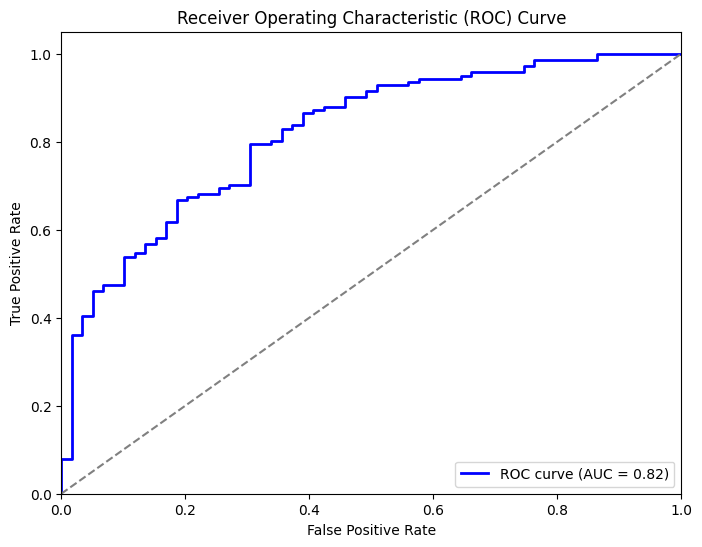

In [292]:
fpr, tpr, thresholds = roc_curve(y_test, xg_pred_probabilities[:,1])

# Calculate AUC score
auc = roc_auc_score(y_test, xg_pred_probabilities[:,1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## - XGBOOST with feature selection

In [293]:
thresholds = sorted(best_model_xgboost.feature_importances_)
thresholds

[0.0,
 0.022856073,
 0.02991551,
 0.03154487,
 0.03366194,
 0.035216827,
 0.037420224,
 0.038812853,
 0.04019276,
 0.04221788,
 0.043616492,
 0.04568782,
 0.04614894,
 0.04940518,
 0.051589653,
 0.054604813,
 0.06502944,
 0.069932796,
 0.08864656,
 0.17349935]

In [294]:
for thresh in thresholds:
    selection = SelectFromModel(best_model_xgboost, threshold=thresh, prefit=True)
    select_X_train = selection.transform(x_train)
 # train model
    selection_model = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1)
    selection_model.fit(select_X_train, y_train)
 # eval model
    select_X_test = selection.transform(x_test)
    predictions = selection_model.predict(select_X_test)
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.000, n=20, Accuracy: 81.00%
Thresh=0.023, n=19, Accuracy: 78.50%


c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.030, n=18, Accuracy: 78.50%
Thresh=0.032, n=17, Accuracy: 81.00%


c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.034, n=16, Accuracy: 80.50%
Thresh=0.035, n=15, Accuracy: 78.50%


c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.037, n=14, Accuracy: 80.50%
Thresh=0.039, n=13, Accuracy: 78.00%


c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.040, n=12, Accuracy: 79.50%
Thresh=0.042, n=11, Accuracy: 77.50%


c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local

Thresh=0.044, n=10, Accuracy: 79.00%
Thresh=0.046, n=9, Accuracy: 77.50%


c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.046, n=8, Accuracy: 78.50%
Thresh=0.049, n=7, Accuracy: 74.00%


c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local

Thresh=0.052, n=6, Accuracy: 74.50%
Thresh=0.055, n=5, Accuracy: 77.50%
Thresh=0.065, n=4, Accuracy: 76.00%
Thresh=0.070, n=3, Accuracy: 75.00%
Thresh=0.089, n=2, Accuracy: 74.50%
Thresh=0.173, n=1, Accuracy: 70.50%


c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [295]:
xgb_feature_selection = x.drop(columns = ["class_age", "is_foreign_worker"])
xgb_feature_selection

,checking_acc_status,duration,cred_hist,purpose,loan_amt,saving_acc_bonds,present_employment_since,installment_rate,personal_stat_gender,other_debtors_guarantors,present_residence_since,property,other_installment_plans,housing,num_curr_loans,job,num_people_provide_maint,telephone
0,1,6,4,7,7.063904,4,0,4,3,2,4,2,1,1,2,1,1,1
1,2,48,0,7,8.691315,1,2,2,0,2,2,2,1,1,1,1,1,0
2,3,12,4,4,7.647786,1,3,2,3,2,3,2,1,1,1,3,2,0
3,1,42,0,5,8.972337,1,3,2,3,1,4,1,1,0,1,1,2,0
4,1,24,1,1,8.490849,1,2,3,3,2,4,3,1,0,2,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12,0,5,7.459339,1,3,3,0,2,4,2,1,1,1,3,1,0
996,1,30,0,2,8.257645,1,2,4,1,2,4,1,1,1,1,0,1,1
997,3,12,0,7,6.689599,1,0,4,3,2,4,0,1,1,1,1,1,0
998,1,45,0,7,7.520235,1,2,4,3,2,4,3,1,0,1,1,1,1


In [296]:
x_train_xg, x_test_xg, y_train_xg, y_test_xg = train_test_split(new_data,y, test_size=0.2, random_state=42)

In [297]:
x_train_xg = scaler.fit_transform(x_train)
x_test_xg = scaler.fit_transform(x_test)

In [298]:
grid_search = GridSearchCV(estimator=xgb.XGBRegressor(), param_grid=hyperparameters_grid_xg, cv = 5,scoring='neg_mean_squared_error', verbose=1)

In [299]:
grid_search.fit(x_train_xg, y_train_xg)

Fitting 5 folds for each of 675 candidates, totalling 3375 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_child_weight': [1, 2, 3],
                         'n_estimators': [100, 150, 200, 250, 300, 350, 400,
                                          450, 500]},
             scoring='neg_mean_squared_error', verbose=1)

In [300]:
print("Best parameters: ",grid_search.best_params_)

Best parameters:  {'learning_rate': 0.1, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 150}


In [301]:
best_model_xgboost_feature = XGBClassifier(n_estimators=150,learning_rate = 0.1, max_depth=2,min_child_weight=3)

In [302]:
best_model_xgboost_feature.fit(x_train_xg, y_train_xg)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [303]:
y_pred_xgboost_feature = best_model_xgboost_feature.predict(x_test_xg)
accuracy_xg_boost_feature = accuracy_score(y_test,y_pred_xgboost_feature)
print("Accuracy of xgboost model: ", accuracy_xg_boost_feature)

Accuracy of xgboost model:  0.745


In [304]:
conf_matrix_xg_feature = confusion_matrix(y_test, y_pred_xgboost_feature)
print("Confusion Matrix:")
print(conf_matrix_xg_feature)

Confusion Matrix:
[[ 19  40]
 [ 11 130]]


In [305]:
#sensitivity
true_positive_xg = conf_matrix_xg_feature[1,1]
false_negative_xg = conf_matrix_xg_feature[0,1]
sensitivity_xg_feature = true_positive_xg/(true_positive_xg + false_negative_xg)
print("Sensitvity: ",sensitivity_xg_feature)

Sensitvity:  0.7647058823529411


In [306]:
#specificity
true_negative_xg = conf_matrix_xg_feature[0,0]
false_positive_xg = conf_matrix_xg_feature[1,0]
specificity_xg_feature = true_negative_xg/(true_negative_xg+false_positive_xg)
print("Specificity: ", specificity_xg_feature)

Specificity:  0.6333333333333333


In [307]:
precision_xg_feature = true_positive_xg/(true_positive_xg+false_positive_xg)
print("Precision: ", precision_xg_feature)

Precision:  0.9219858156028369


In [308]:
f1_score_xg_feature = 2 * (precision_xg_feature * sensitivity_xg_feature)/(precision_xg_feature+sensitivity_xg_feature)
print("F1 score: ", f1_score_xg_feature)

F1 score:  0.8360128617363344


In [309]:
xg_pred_probabilities_feature = best_model_xgboost_feature.predict_proba(x_test_xg)
xg_pred_probabilities_feature

array([[0.21931624, 0.78068376],
       [0.26975667, 0.7302433 ],
       [0.37901443, 0.62098557],
       [0.17524904, 0.82475096],
       [0.6104131 , 0.38958693],
       [0.23155826, 0.76844174],
       [0.11954713, 0.8804529 ],
       [0.3874609 , 0.6125391 ],
       [0.14698601, 0.853014  ],
       [0.4357896 , 0.5642104 ],
       [0.23295724, 0.76704276],
       [0.5220161 , 0.4779839 ],
       [0.14245737, 0.85754263],
       [0.72952175, 0.27047822],
       [0.5671357 , 0.4328643 ],
       [0.34784228, 0.6521577 ],
       [0.12332743, 0.87667257],
       [0.29334533, 0.70665467],
       [0.5561842 , 0.44381586],
       [0.4146421 , 0.5853579 ],
       [0.16740829, 0.8325917 ],
       [0.1568774 , 0.8431226 ],
       [0.2615264 , 0.7384736 ],
       [0.07673234, 0.92326766],
       [0.10919428, 0.8908057 ],
       [0.4222911 , 0.5777089 ],
       [0.35858458, 0.6414154 ],
       [0.3870141 , 0.6129859 ],
       [0.37944603, 0.620554  ],
       [0.1219179 , 0.8780821 ],
       [0.

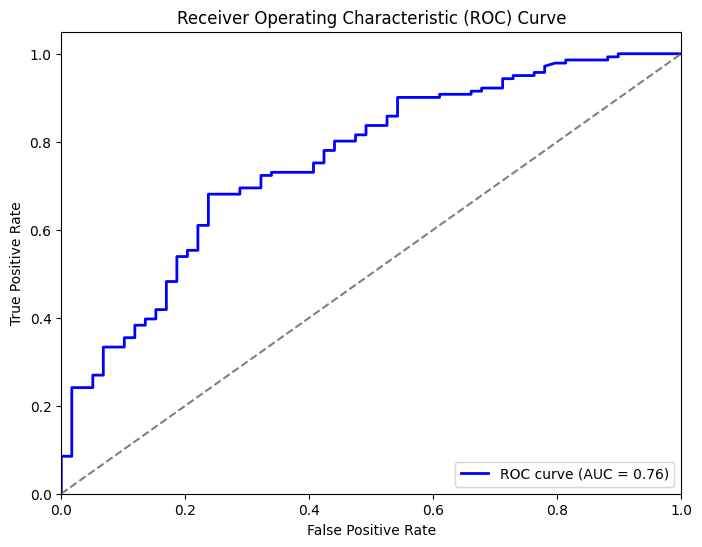

In [310]:
fpr, tpr, thresholds = roc_curve(y_test, xg_pred_probabilities_feature[:,1])

# Calculate AUC score
auc = roc_auc_score(y_test, xg_pred_probabilities_feature[:,1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## - XGBOOST with top 5 features

In [311]:
top_5_features = ["checking_acc_status", "other_debtors_guarantors", "other_installment_plans","saving_acc_bonds","loan_amt"]
top5 = credit[top_5_features]

In [312]:
x_train_xg, x_test_xg, y_train_xg, y_test_xg = train_test_split(top5,y, test_size=0.2, random_state=42)

In [313]:
hyperparameters_grid_xg = {
    "n_estimators":[100,150,200,250,300,350,400,450,500],
    "learning_rate":[0.1,0.2,0.3,0.4,0.5],
    "max_depth":[1,2,3,4,5],
    "min_child_weight":[1,2,3]
}
hyperparameters_grid_xg

{'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500],
 'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
 'max_depth': [1, 2, 3, 4, 5],
 'min_child_weight': [1, 2, 3]}

In [314]:
grid_search = GridSearchCV(estimator=xgb.XGBRegressor(), param_grid=hyperparameters_grid_xg, cv = 5,scoring='neg_mean_squared_error', verbose=1)

In [315]:
grid_search.fit(x_train_xg, y_train_xg)

Fitting 5 folds for each of 675 candidates, totalling 3375 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_child_weight': [1, 2, 3],
                         'n_estimators': [100, 150, 200, 250, 300, 350, 400,
                                          450, 500]},
             scoring='neg_mean_squared_error', verbose=1)

In [316]:
print("Best parameters: ",grid_search.best_params_)

Best parameters:  {'learning_rate': 0.1, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 150}


In [317]:
best_model_xgboost_5features= XGBClassifier(n_estimators=150,learning_rate = 0.1, max_depth=1,min_child_weight=1)

In [318]:
best_model_xgboost_5features.fit(x_train_xg, y_train_xg)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [319]:
y_pred_xgboost_5features = best_model_xgboost_5features.predict(x_test_xg)
accuracy_xg_boost_5features = accuracy_score(y_test,y_pred_xgboost_5features)
print("Accuracy of xgboost model: ", accuracy_xg_boost_5features)

Accuracy of xgboost model:  0.695


In [320]:
conf_matrix_xg_5features = confusion_matrix(y_test, y_pred_xgboost_5features)
print("Confusion Matrix:")
print(conf_matrix_xg_5features)

Confusion Matrix:
[[  8  51]
 [ 10 131]]


In [321]:
#sensitivity
true_positive_xg = conf_matrix_xg_5features[1,1]
false_negative_xg = conf_matrix_xg_5features[0,1]
sensitivity_xg_5features = true_positive_xg/(true_positive_xg + false_negative_xg)
print("Sensitvity: ",sensitivity_xg_5features)

Sensitvity:  0.7197802197802198


In [322]:
#specificity
true_negative_xg = conf_matrix_xg_5features[0,0]
false_positive_xg = conf_matrix_xg_5features[1,0]
specificity_xg_5features = true_negative_xg/(true_negative_xg+false_positive_xg)
print("Specificity: ", specificity_xg_5features)

Specificity:  0.4444444444444444


In [323]:
precision_xg_5features = true_positive_xg/(true_positive_xg+false_positive_xg)
print("Precision: ", precision_xg_5features)

Precision:  0.9290780141843972


In [324]:
f1_score_xg_5features = 2 * (precision_xg_5features * sensitivity_xg_5features)/(precision_xg_5features+sensitivity_xg_5features)
print("F1 score: ", f1_score_xg_5features)

F1 score:  0.8111455108359134


In [325]:
xg_pred_probabilities_5features = best_model_xgboost_5features.predict_proba(x_test_xg)
xg_pred_probabilities_5features

array([[0.40982193, 0.5901781 ],
       [0.53644264, 0.46355736],
       [0.53178823, 0.4682118 ],
       [0.2776206 , 0.7223794 ],
       [0.19267654, 0.80732346],
       [0.53178823, 0.4682118 ],
       [0.2375645 , 0.7624355 ],
       [0.17750448, 0.8224955 ],
       [0.09770584, 0.90229416],
       [0.19172531, 0.8082747 ],
       [0.26089507, 0.7391049 ],
       [0.47466666, 0.52533334],
       [0.15012014, 0.84987986],
       [0.46667284, 0.53332716],
       [0.4469    , 0.5531    ],
       [0.46667284, 0.53332716],
       [0.08015078, 0.9198492 ],
       [0.15012014, 0.84987986],
       [0.40982193, 0.5901781 ],
       [0.40982193, 0.5901781 ],
       [0.21064383, 0.7893562 ],
       [0.40982193, 0.5901781 ],
       [0.19267654, 0.80732346],
       [0.12527013, 0.8747299 ],
       [0.0892756 , 0.9107244 ],
       [0.43655968, 0.5634403 ],
       [0.32652706, 0.67347294],
       [0.34178555, 0.65821445],
       [0.22789794, 0.77210206],
       [0.0892756 , 0.9107244 ],
       [0.

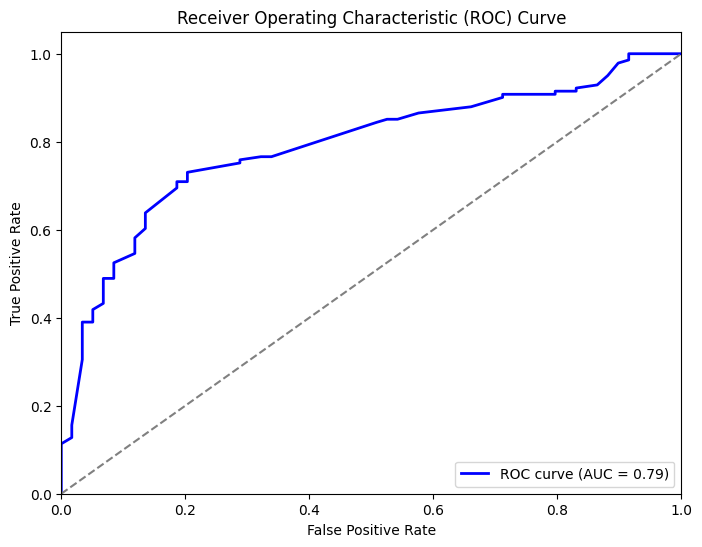

In [326]:
fpr, tpr, thresholds = roc_curve(y_test, xg_pred_probabilities_5features[:,1])

# Calculate AUC score
auc = roc_auc_score(y_test, xg_pred_probabilities_5features[:,1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## COMPARING THE MODELS

In [327]:
name_models= ["Logistic Regression", "Lasso Logistic Regression", "Random Forest", "Random Forest with feature selection", "XGBoost","XGBoost with feature selection","XGBoost with 5 features" ]


In [328]:
data_model_comparison = {
    "Specificity": [specificity_lr, specificity_lasso,specificity_best_rf, specificity_rf, specificity_xg,specificity_xg_feature, specificity_xg_5features],
    "Sensitivity": [sensitivity_lr,sensitivity_lasso, sensitivity_best_rf, sensitivity_rf, sensitivity_xg,sensitivity_xg_feature, sensitivity_xg_5features],
    "F1 score":  [f1_score_lr,f1_score_lasso, f1_score_best_rf, f1_score_rf, f1_score_xg,f1_score_xg_feature, f1_score_xg_5features],
    "Precision": [precision_lr,precision_lasso, precision_best_rf, precision_rf,precision_xg,precision_xg_feature, precision_xg_5features],  
    "Accuracy":[accuracy_lr,accuracy_lasso,accuracy_best_random,accuracy_random_selected_features,accuracy_xg_boost,accuracy_xg_boost_feature,accuracy_xg_boost_5features], 
    "AUC":[0.74, 0.74, 0.81, 0.80, 0.81, 0.70, 0.79]
}

In [329]:
model_comparison = pd.DataFrame(data_model_comparison)
model_comparison.index = name_models
model_comparison

,Specificity,Sensitivity,F1 score,Precision,Accuracy,AUC
Logistic Regression,0.423729,0.886525,0.833333,0.786164,0.750,0.74
Lasso Logistic Regression,0.708333,0.761364,0.845426,0.950355,0.755,0.74
Random Forest,0.769231,0.775862,0.857143,0.957447,0.775,0.81
Random Forest with feature selection,0.689655,0.771930,0.846154,0.936170,0.760,0.80
XGBoost,0.681818,0.814103,0.855219,0.900709,0.785,0.81
XGBoost with feature selection,0.633333,0.764706,0.836013,0.921986,0.745,0.70
XGBoost with 5 features,0.444444,0.719780,0.811146,0.929078,0.695,0.79


Between all of these models, we look at the AUV to choose the best one. Here, we can see that Random Forest and XGBoost have the same AUC (0.81). In order to determine the optimal ones, we have to change the evaluation criteria. We observe the **specificty**, this because we give more importance to the FN, because it's here that the bank get the major losses. For a bank, there is the opportunity to lose money (FP) where we fail to classify good client (and classify them as a bad opportunity, committing a mistake), and to lose more money due to the failure of the client to whose we gave the loan, committing a mistake. In this context, the **Random Forest** is the optimal choice.

**Loss Given Default**

Hp: 
- a recovery rate of 0.9 for poeple with a guarantor
- a recovery rate of 0.6 for people with a co-applicant
- a recovery rate of 0.4 for people without nobody

In [330]:

credit["other_debtors_guarantors"].value_counts()

2    907
1     52
0     41
Name: other_debtors_guarantors, dtype: int64

In [331]:
credit["other_debtors_guarantors"].value_counts()

2    907
1     52
0     41
Name: other_debtors_guarantors, dtype: int64

In [332]:
def recovery_rate(debt):
    if debt == 0:
        recovery_rate =0.6
    elif debt == 1:
        recovery_rate=0.9
    elif debt == 2:
        recovery_rate=0.4
    else:
        print ("error")
    return recovery_rate

In [333]:
credit["recovery rate"] = credit["other_debtors_guarantors"].apply(recovery_rate)
credit

,checking_acc_status,duration,cred_hist,purpose,loan_amt,saving_acc_bonds,present_employment_since,installment_rate,personal_stat_gender,other_debtors_guarantors,...,other_installment_plans,housing,num_curr_loans,job,num_people_provide_maint,telephone,is_foreign_worker,class_age,target,recovery rate
0,1,6,4,7,7.063904,4,0,4,3,2,...,1,1,2,1,1,1,1,2,1,0.4
1,2,48,0,7,8.691315,1,2,2,0,2,...,1,1,1,1,1,0,1,0,0,0.4
2,3,12,4,4,7.647786,1,3,2,3,2,...,1,1,1,3,2,0,1,1,1,0.4
3,1,42,0,5,8.972337,1,3,2,3,1,...,1,0,1,1,2,0,1,1,1,0.9
4,1,24,1,1,8.490849,1,2,3,3,2,...,1,0,2,1,2,0,1,1,0,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12,0,5,7.459339,1,3,3,0,2,...,1,1,1,3,1,0,1,0,1,0.4
996,1,30,0,2,8.257645,1,2,4,1,2,...,1,1,1,0,1,1,1,1,1,0.4
997,3,12,0,7,6.689599,1,0,4,3,2,...,1,1,1,1,1,0,1,1,1,0.4
998,1,45,0,7,7.520235,1,2,4,3,2,...,1,0,1,1,1,1,1,0,0,0.4


In [334]:
def loss_given_default(loan, recovery_rate):
    loss_given_default = loan * (1 - recovery_rate)
    return loss_given_default

In [335]:
l_g_d = loss_given_default(credit["loan_amt"], credit["recovery rate"])
l_g_d

0      4.238342
1      5.214789
2      4.588672
3      0.897234
4      5.094510
         ...   
995    4.475603
996    4.954587
997    4.013760
998    4.512141
999    5.057148
Length: 1000, dtype: float64

In [336]:
def expected_loss(prob_default, loss_given_default, loan):
    expected_loss = prob_default * loss_given_default * loan
    return expected_loss